# Gráficos com Pandas e Matplotlib

Neste notebook veremos como podemos usar as bibliotecas pandas e matplotlib para visualizar os nossos dados através de gráficos.

Primeiramente é necessário importar as respectivas bibliotecas:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

A seguir vamos carregar os dados para usarmos eles em nossos exemplos:

In [9]:
df = pd.DataFrame({
    'nome': ['Paulo','Daniel','Maria','Lucas','Tiago','Marina','Julia','Carla'],
    'idade': [23,78,22,19,45,33,20,23],
    'gênero': ['M','M','F','M','M','F','F','F'],
    'estado': ['SP','RJ','SC','SP','PE','PR','PR','SP'],
    'crianças': [2,0,0,3,2,1,4,0],
    'animais': [1,2,3,5,1,2,1,2]
})

Chamamos o DataFrame **df** para vermos a tabela com os nossos dados:

In [10]:
df

,nome,idade,gênero,estado,crianças,animais
0,Paulo,23,M,SP,2,1
1,Daniel,78,M,RJ,0,2
2,Maria,22,F,SC,0,3
3,Lucas,19,M,SP,3,5
4,Tiago,45,M,PE,2,1
5,Marina,33,F,PR,1,2
6,Julia,20,F,PR,4,1
7,Carla,23,F,SP,0,2


### Gráficos

Pandas é uma biblioteca capaz de se integrar facilmente com a biblioteca matplotlib.

Podemos plotar diretamente do DataFrame utilizando o método **plot**.

A seguir apresentamos um gráfico de dispersão comparando o número de crianças e o número de pets de cada pessoa:

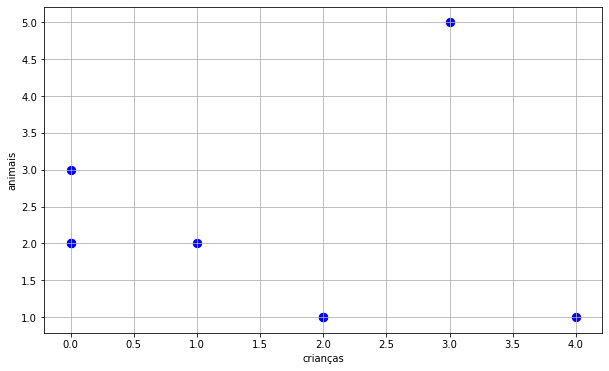

In [34]:
df.plot(kind='scatter', x='crianças', y='animais', color='blue', figsize=(10,6), grid=True, s=70);

Podemos plotar os valores das colunas utilizando um gráfico de barras, neste caso a idade de cada pessoa:

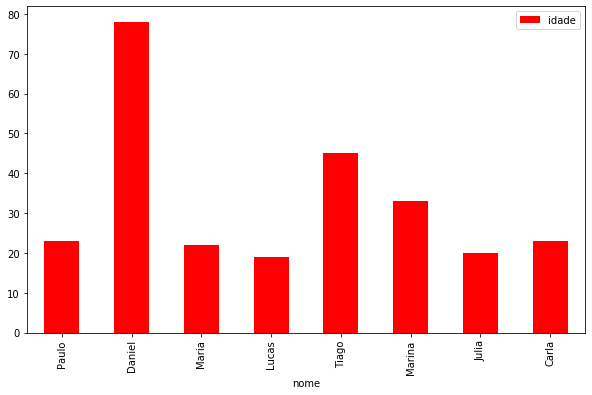

In [38]:
df.plot(kind='bar', x='nome', y='idade', figsize=(10,6), colormap='prism');

Podemos também utilizar gráficos de linha, usando múltiplas colunas.

**gca** significa 'get current axis':

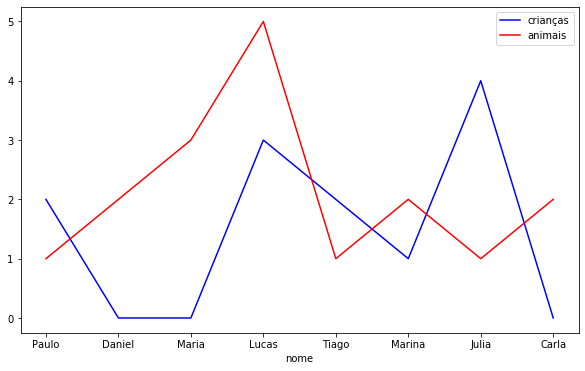

In [41]:
ax = plt.gca()
df.plot(kind='line', x='nome', y='crianças', color='blue', ax=ax, figsize=(10,6))
df.plot(kind='line', x='nome', y='animais', color='red', ax=ax, figsize=(10,6))
plt.show()

### Salvando o Gráfico

Se quisermos guardar uma imagem do nosso gráfico, em vez de chamarmos o método **plt.show()**, chamamos **plt.savefig()**.

Neste exemplo, o gráfico será salvo como o arquivo de nome `grafico.png`.

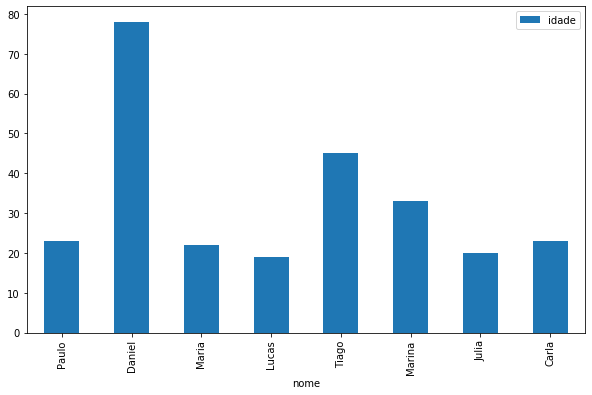

In [42]:
df.plot(kind='bar', x='nome' ,y='idade', figsize=(10,6))
plt.savefig('grafico.png')

### Gráfico de Barras com Agrupamento

A seguir podemos ver como podemos agrupar nossos dados para realizarmos visualizações interessantes.

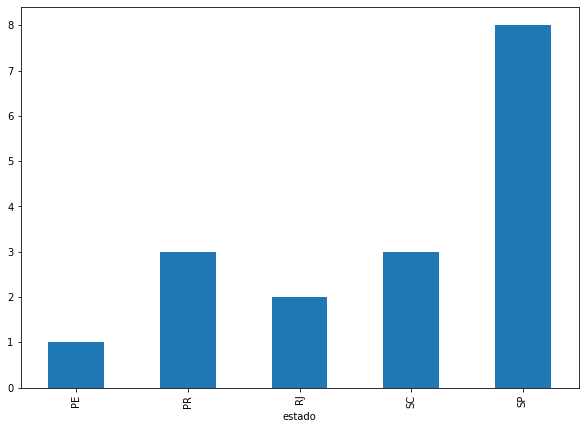

In [47]:
df.groupby('estado')['animais'].sum().plot(kind='bar', figsize=(10,7));

### Gráfico de Barras Empilhadas com Agrupamento e Contagem de Percentagem

Para isso contaremos com a ajuda dos métodos **groupby()** e **unstack()**:

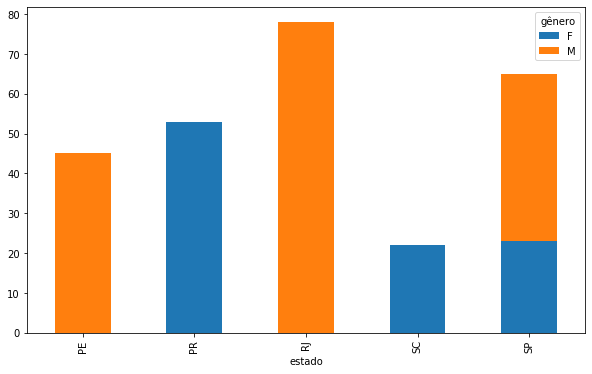

In [52]:
df.groupby(['estado','gênero'])['idade'].sum().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.show()

Tabmém podemos realizar a contagem de pessoas por gênero, dividindo por estados:

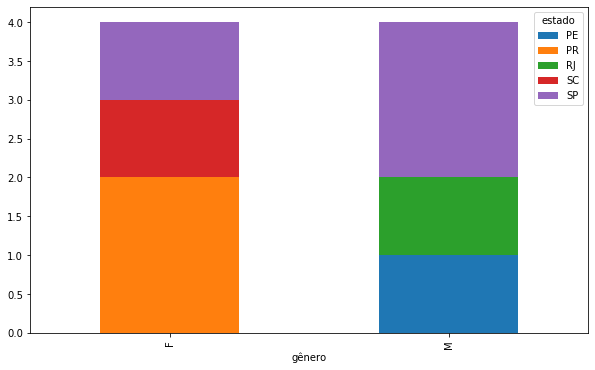

In [54]:
df.groupby(['gênero','estado'])['nome'].size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.show()

### Gráfico de Barras Empilhadas com Dois Níveis de Agrupamento e Percentagens Normalizadas para 100%

As vezes estamos apenas interessados na distribuição, não em quantidades brutas:

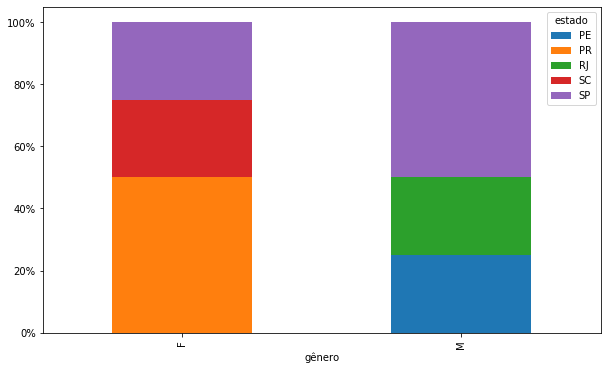

In [55]:
import matplotlib.ticker as mtick

df.groupby(['gênero','estado']).size().groupby(level=0).apply(lambda x: 100*x/x.sum()).unstack().plot(kind='bar',stacked=True,figsize=(10,6))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Visualizando um Gráfico Histograma de Valores de Coluna

Podemos usar uma histograma para ver a distribuição da idade das pessoas:

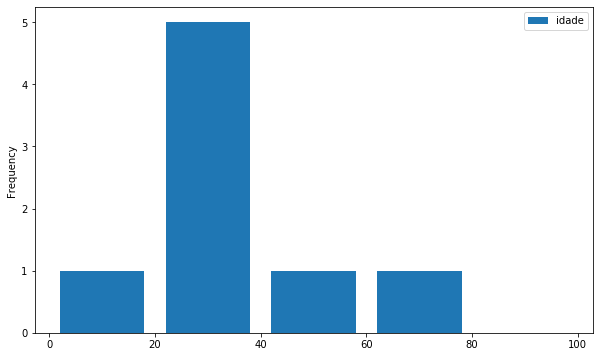

In [66]:
df[['idade']].plot(kind='hist', bins=[0,20,40,60,80,100], rwidth=0.8, figsize=(10,6))
plt.show()

### Histograma de Datas

Para plotarmos um histograma de datas, é necessário primeiro fazermos a conversão da coluna de data para **datetime** utilizando o método **pandas.datetime**.

Como ainda não temos uma coluna de data, vamos construir um novo **DataFrame** com as respectivas datas:

In [72]:
df = pd.DataFrame({
    'nome': ['Paulo','Daniel','Maria','Lucas','Tiago','Marina','Julia','Carla'],
    'nascimento': ['06/22/1998','02/05/1943','05/25/1999','08/10/2002','07/30/1976','06/12/1988','12/25/2001','11/21/1998']
})
df

,nome,nascimento
0,Paulo,06/22/1998
1,Daniel,02/05/1943
2,Maria,05/25/1999
3,Lucas,08/10/2002
4,Tiago,07/30/1976
5,Marina,06/12/1988
6,Julia,12/25/2001
7,Carla,11/21/1998


Observe que as datas foram adicionadas como strings no formato americano.

Agora podemos converter a coluna **nascimento** para o tipo **datetime** e plotar o histograma:

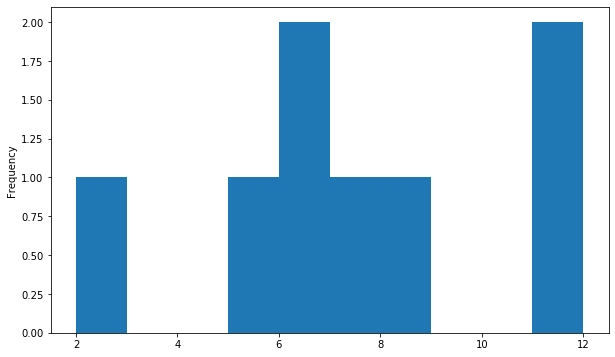

In [73]:
df['nascimento'] = pd.to_datetime(df['nascimento'],infer_datetime_format=True)

fig, ax = plt.subplots()
fig.set_tight_layout(False)
plt.clf()
df['nascimento'].map(lambda d: d.month).plot(kind='hist', figsize=(10,6))
plt.show()

Como podemos ver, nós é mostrado a relação entre o mês e a frequência de pessoas que nasceram nele.